## Intro to Recomb_Knapsack

This notebook serves as an introduction and walkthrough for the main functions provided by the `recomb_knapsack` package in order to experimentally test redistricting through recombination steps and MCMC sampling. Be sure to check out the write-up in the `docs` directory for more information about the package!

In [2]:
import recomb_knapsack.utils as rk_utils
import recomb_knapsack.sampling as rk_sampling

import matplotlib.pyplot as plt

### Generating Data

`recomb_knapsack` currently supports three types of data generation: `epsilon`, `gamma`, and `gamma_clean`, all accessed through `recomb_knapsack.utils`.

- `epsilon` samples follow the Normal distribution centered at 1, with standard deviation defined by the input parameter `ep`.
- `gamma` samples follow a gamma distribution tuned to closely resemble the distribution of populations of U.S. precincts.
- `gamma_clean` samples follow the same distribution as `gamma`, but are then rounded to integers, with negative samples being set to zero.

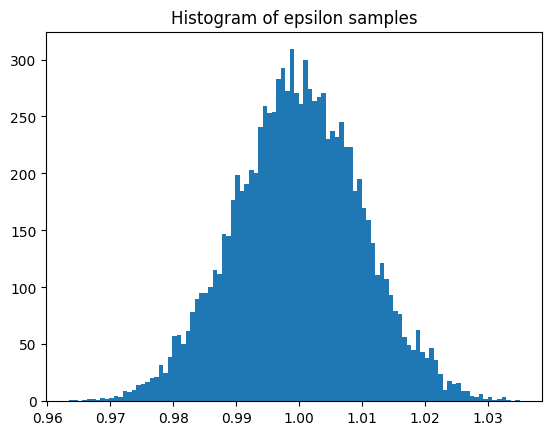

In [3]:
epsilon_samples = rk_utils.generate_epsilon(ep=0.01, size=10000)

plt.hist(epsilon_samples, bins=100)
plt.title('Histogram of epsilon samples')
plt.show()

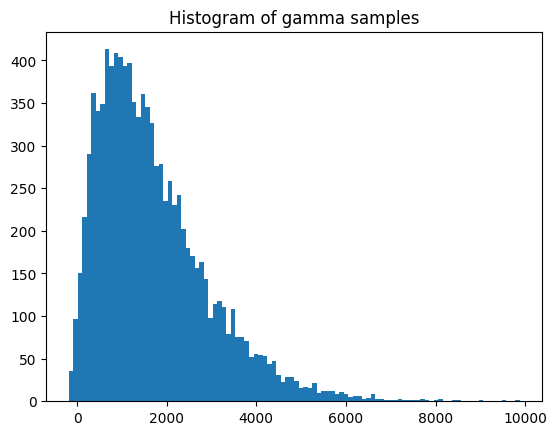

In [4]:
gamma_samples = rk_utils.generate_gamma(size=10000)

plt.hist(gamma_samples, bins=100)
plt.title('Histogram of gamma samples')
plt.show()

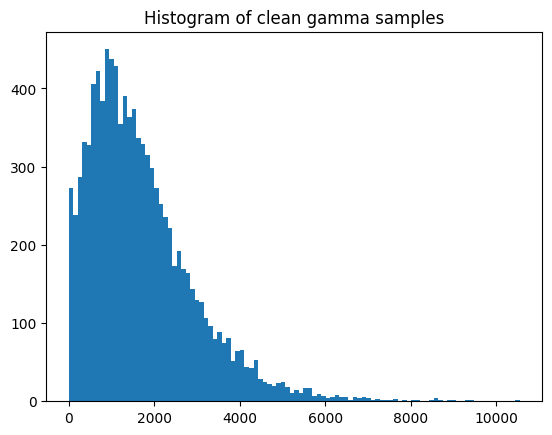

In [5]:
clean_gamma_samples = rk_utils.generate_gamma_clean(size=10000)

plt.hist(clean_gamma_samples, bins=100)
plt.title('Histogram of clean gamma samples')
plt.show()

In [6]:
# Showing that clean_gamma_samples are all integers
print(clean_gamma_samples[:10])

[1881.  157. 1664.  205. 1708. 2602. 1207.  581. 2613.    0.]


### Sampling Recombination Steps

`recomb_knapsack` has two currently supported ways to perform recombination sampling: `equal_weights` and `first_valid`. They are called with various parameters, such as the number of desired districts, the allowed tolerance, and the number of steps to run the sampling method for. See the writeup in `docs` for more information about how these sampling methods work.

Performing sampling on any generated data (or any list of floats) is very straightforward through `recomb_knapsack.sampling`. Recombination sampling returns two outputs: the count of how many steps resulted in valid configurations, and a frequency table of how often a particular configuration appeared as a valid solution. Using these together gives the opportunity to investigate the properties of valid redistricting solutions given certain parameters.

In [7]:
sample = rk_utils.generate_epsilon(ep=0.01, size=10)
sample

array([1.00836281, 0.99512165, 1.00283964, 0.9922274 , 1.01612769,
       1.02070032, 1.00335142, 1.00257166, 0.99282512, 0.99151398])

In [29]:
count, sols = rk_sampling.equal_weights_recomb(X=sample, k=5, tol=0.02, max_iter=10)

print("Total number of valid sampling steps: ", count)
print("Solutions: ")

if count > 0:
    for sol in sols:
        for district in sol:
            print("\t- ", district)
        print("\tAppeared {} times\n".format(sols[sol]))
else:
    print("No solutions found.")

Total number of valid sampling steps:  8
Solutions: 
	-  (0.9915139837452243, 1.0025716615059408)
	-  (0.992227395067902, 1.0083628085965748)
	-  (0.9928251190345445, 1.0028396413091905)
	-  (0.9951216465167638, 1.020700320751714)
	-  (1.0033514213605614, 1.0161276850235301)
	Appeared 2 times

	-  (0.9915139837452243, 1.0161276850235301)
	-  (0.992227395067902, 1.0083628085965748)
	-  (0.9928251190345445, 1.0028396413091905)
	-  (0.9951216465167638, 1.020700320751714)
	-  (1.0025716615059408, 1.0033514213605614)
	Appeared 2 times

	-  (0.9915139837452243, 1.0161276850235301)
	-  (0.992227395067902, 1.0083628085965748)
	-  (0.9928251190345445, 1.020700320751714)
	-  (0.9951216465167638, 1.0028396413091905)
	-  (1.0025716615059408, 1.0033514213605614)
	Appeared 2 times

	-  (0.9915139837452243, 1.0025716615059408)
	-  (0.992227395067902, 1.0083628085965748)
	-  (0.9928251190345445, 1.020700320751714)
	-  (0.9951216465167638, 1.0028396413091905)
	-  (1.0033514213605614, 1.0161276850235301